# PRÁCTICA 2A

Itziar López Almagro y Adrián Carlos Skaczylo

In [ ]:
!pip install numpy
!pip install scikit-learn

In [ ]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

Ejecutamos un ejemplo con dos variables de entrada.

In [ ]:
reg = linear_model.LinearRegression()
print(reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2]))
print(reg.coef_)

LinearRegression()
[0.5 0.5]


# Parte A

Definimos una función que, dado un instante de tiempo
𝑥 (en segundos), devuelve el valor de la frecuencia cardíaca estimada en ese momento, aplicando la ecuación definida con un coeficiente fijo y una variación aleatoria.

In [ ]:
def f(x):
  return 0.7* x + 60 + np.random.uniform(-5.9, 5.9, size = len(x))

Definimos una función para generar los valores de
𝑥, que representan los instantes de tiempo en segundos a lo largo de un minuto. Luego, calculamos y almacenamos en
𝑦 la frecuencia cardíaca correspondiente para cada instante, aplicando la fórmula establecida.

In [ ]:
def generarDatosFC(f):
  x = np.arange(0,61,1) #Generamos los valores de x ( el tiempo)
  y = f(x)

  return np.array([[i] for i in x]),y #devolvemos los datos preparados para linearregresion

Generamos los valores de 𝑥 e 𝑦, donde 𝑥 representa el tiempo en segundos e 𝑦 la frecuencia cardíaca correspondiente. Luego, creamos el modelo de regresión lineal y lo entrenamos utilizando estos datos.

In [ ]:
x,y = generarDatosFC(f)
modelo = linear_model.LinearRegression()
modelo.fit(x, y)

LinearRegression()

Extraemos los coeficientes de la regresión lineal, incluyendo la pendiente y el intercepto, que nos indican la relación entre el tiempo y la frecuencia cardíaca. Además, generamos las predicciones del modelo para analizar cómo se ajusta a los datos reales.

In [ ]:
coeficiente = modelo.coef_[0]
ti = modelo.intercept_
print(f"Coeficiente: {coeficiente}")
print(f"Termino Independiente: {ti}")
# Generar valores de y predichos por el modelo
y_pred = modelo.predict(x)

Coeficiente: 0.6986589552999478
Termino Independiente: 59.90500380859954


El score del modelo de regresión lineal en scikit-learn representa el coeficiente de determinación $R^2$
 , que indica qué tan bien se ajusta el modelo a los datos. Un score de 0.92 significa que el modelo de regresión lineal explica el 92% de la variabilidad en los datos, lo cual indica un excelente ajuste.

¿Qué implica este resultado?

* Buena capacidad predictiva: El modelo captura la relación entre las variables con gran precisión.
*  Baja cantidad de error: Solo un 8% de la variabilidad no es explicada por el modelo.
* Regresión bien ajustada: Se espera que las predicciones sean bastante confiables

In [ ]:
# Calcular R^2 en los datos de prueba
r2_score = modelo.score(x, y)
print(f"R^2 Score: {r2_score:.4f}")

R^2 Score: 0.9206


Representamos gráficamente la regresión lineal obtenida junto con los datos generados.

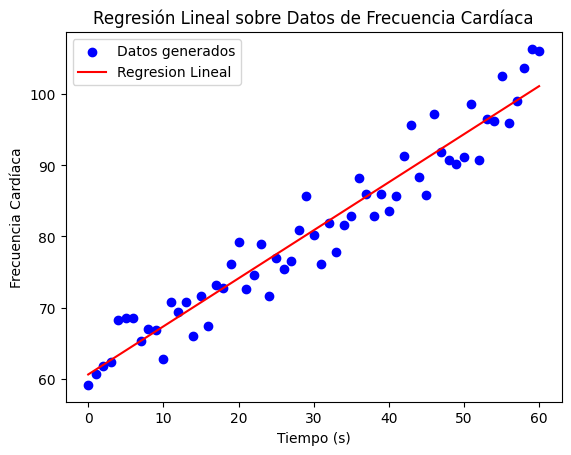

In [ ]:
# Graficar
plt.scatter(x, y, label="Datos generados", color="blue")
plt.plot(x, y_pred, label="Regresion Lineal", color="red")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia Cardíaca")
plt.legend()
plt.title("Regresión Lineal sobre Datos de Frecuencia Cardíaca")
plt.show()

Los resultados muestran que la regresión lineal se ajusta de manera adecuada a los datos generados. En la gráfica, los puntos azules representan las mediciones simuladas de la frecuencia cardíaca a lo largo del tiempo, mientras que la línea roja representa la regresión lineal ajustada. Se observa que la línea sigue de cerca la tendencia general de los datos, lo que indica que el modelo captura bien la relación entre el tiempo y la frecuencia cardíaca.

El coeficiente obtenido en la regresión refleja la tasa de cambio de la frecuencia cardíaca con respecto al tiempo, mientras que el intercepto representa el valor estimado de la frecuencia cardíaca en el segundo 0. La dispersión de los puntos alrededor de la línea roja puede deberse a la variación aleatoria introducida en los datos, simulando fluctuaciones naturales en las mediciones reales.

En general, el modelo es útil para predecir la frecuencia cardíaca en función del tiempo.

En la práctica con LinearRegression, algunos de los atributos que más llaman la atención son:

*  coef_ (Coeficientes de la regresión): Representa los pesos asignados a cada variable independiente. Indica la relación entre cada variable de entrada y la variable objetivo.

* intercept_ (Término independiente): Es el valor de Y cuando todas las variables de entrada son cero, mostrando dónde corta la recta al eje Y.

* score() (Coeficiente de determinación $R^2$
 ): Mide qué tan bien se ajusta el modelo a los datos. En este caso, el modelo obtuvo un score de 0.92, lo que indica que explica el 92% de la variabilidad en los datos.